## Exploracion basica de un archivo .mat

El siguiente notebook explora de manera sencilla un archivo de matlab donde se guarda la información de un sensor.

In [30]:
import scipy.io
from scipy import signal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

In [31]:
# prompt: necesito cargar un archivo mat que esta en esta misma carpeta usando pandas

import scipy.io
import pandas as pd

# Ruta al archivo .mat en Google Drive
mat_file_path = 'S1_A1_E1.mat'  # Reemplaza con la ruta correcta
mat_data = scipy.io.loadmat(mat_file_path)
keys_mat_data = list(mat_data.keys())
print(keys_mat_data)
column_names = keys_mat_data[3:]
print(column_names)

['__header__', '__version__', '__globals__', 'emg', 'stimulus', 'glove', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition']
['emg', 'stimulus', 'glove', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition']


In [32]:
# Funciones sobre las señales

# Numero del estimulo
def indice_numero(df, num):
  return (df.index[df == num][0],df.index[df == num][-1])

# Cambios de nivel
def detectar_cambios_nivel(data, valor):
    cambios = []
    for i in range(1, len(data)):
        if data[i] == valor and data[i-1] != valor:
            cambios.append((i-1,0))
            cambios.append((i,valor))
        elif data[i] != valor and data[i-1] == valor:
            cambios.append((i-1,valor))
            cambios.append((i,0))
    cambios.pop(0)
    cambios.pop()
    return cambios

In [33]:
# Funciones de graficado

def graficar_serie1(serie, punto_inicial = 0, num_puntos = 1000, titulo=None, etiqueta_x=None, etiqueta_y=None):
    # Si se especifica num_puntos, selecciona solo los primeros num_puntos de la Serie
    if num_puntos:
        serie = serie.iloc[punto_inicial:punto_inicial + num_puntos]


    plt.figure(figsize=(20, 1))  # Ajusta el tamaño del gráfico

    plt.plot(serie)  # Dibuja la serie con puntos marcados
    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    plt.grid(True)  # Activa la cuadrícula
    plt.show()

def graficar_serie2(df_medida, df_label, num, titulo=None, etiqueta_x=None, etiqueta_y=None):
    [inicio,fin]= indice_numero(df_label, num)
    num_puntos = fin - inicio
    ban_end = False
    ban_add_vertical_lines = False
    lim = [0 , 0]
    limites_x = []

    # Si se especifica num_puntos, selecciona solo los primeros num_puntos de la Serie
    if num_puntos:
        df_medida = df_medida.iloc[inicio:inicio + num_puntos]
    fig, ax = plt.subplots(figsize=(20, 5))

    cambios_nivel = detectar_cambios_nivel(df_label, num)
    # Añadir las bandas verticales sombreadas con los límites proporcionados
    for cambio_nivel in cambios_nivel:
      if(cambio_nivel[1] == 0):
        if ban_end == False:
          lim[0] = cambio_nivel[0]
          ban_end = True
        else:
          lim[1] = cambio_nivel[0]
          ban_end = False
          ax.axvspan(lim[0], lim[1], color='gray', alpha=0.3, label=f'Sombreado entre {lim[0]} y {lim[1]}')

    plt.plot(df_medida)  # Dibuja la serie con puntos marcados
    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    plt.grid(True)  # Activa la cuadrícula
    plt.show()

def graficar_serie3(df_medida, df_num_label, num, titulo=None, etiqueta_x=None, etiqueta_y=None):
    [inicio,fin]= indice_numero(df_num_label, num)
    num_puntos = fin - inicio
    ban_end = False
    ban_add_vertical_lines = False
    lim = [0 , 0]
    limites_x = []

    # Si se especifica num_puntos, selecciona solo los primeros num_puntos de la Serie
    if num_puntos:
        df_medida = df_medida.iloc[inicio:inicio + num_puntos]
    fig, ax = plt.subplots(figsize=(20, 5))

    cambios_nivel = detectar_cambios_nivel(df_num_label, num)
    # Añadir las bandas verticales sombreadas con los límites proporcionados
    for cambio_nivel in cambios_nivel:
      if(cambio_nivel[1] == 0):
        if ban_end == False:
          lim[0] = cambio_nivel[0]
          ban_end = True
        else:
          lim[1] = cambio_nivel[0]
          ban_end = False
          ax.axvspan(lim[0], lim[1], color='gray', alpha=0.3, label=f'Sombreado entre {lim[0]} y {lim[1]}')

    plt.plot(df_medida)  # Dibuja la serie con puntos marcados
    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    plt.grid(True)  # Activa la cuadrícula
    plt.show()

def graficar_series4(df_medida, columnas_medida, df_num_label, num, titulo=None, etiqueta_x=None, etiqueta_y=None):
    [inicio,fin]= indice_numero(df_num_label, num)
    num_puntos = fin - inicio
    ban_end = False
    ban_add_vertical_lines = False
    lim = [0 , 0]
    limites_x = []

    # Si se especifica num_puntos, selecciona solo los primeros num_puntos de la Serie
    fig, ax = plt.subplots(figsize=(20, 5))
    if num_puntos:
        for columna in columnas_medida:
           df_col = df_medida[columna].iloc[inicio:inicio + num_puntos]
           plt.plot(df_col.index, df_col, label=columna)  # Graficar cada columna



    cambios_nivel = detectar_cambios_nivel(df_num_label, num)
    # Añadir las bandas verticales sombreadas con los límites proporcionados
    for cambio_nivel in cambios_nivel:
      if(cambio_nivel[1] == 0):
        if ban_end == False:
          lim[0] = cambio_nivel[0]
          ban_end = True
        else:
          lim[1] = cambio_nivel[0]
          ban_end = False
          ax.axvspan(lim[0], lim[1], color='gray', alpha=0.3, label=f'Sombreado entre {lim[0]} y {lim[1]}')

    #plt.plot(df_medida)  # Dibuja la serie con puntos marcados
    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    plt.grid(True)  # Activa la cuadrícula
    plt.show()


def graficar_varias_columnas(df, columnas, titulo=None, etiqueta_x= None, etiqueta_y=None):
    plt.figure(figsize=(20, 4))  # Tamaño del gráfico

    # Iterar sobre cada columna en la lista de columnas
    for columna in columnas:
        plt.plot(df.index, df[columna], label=columna)  # Graficar cada columna

    # Añadir títulos y etiquetas
    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    plt.legend()  # Añadir la leyenda para distinguir las columnas
    plt.grid(True)  # Añadir cuadrícula
    plt.show()

Segun la IA el archivo .mat tiene:
* **`emg`**: Matriz con las señales EMG (10 columnas)
* **`glove`**: Matriz con datos del CyberGlove (22 columnas)
* **`stimulus`**: Vector con etiquetas de movimientos
* **`repetition`**: Vector con números de repetición
* **`rerepetition`**: Vector indicando repeticiones adicionales
* **`subject`**: Número de sujeto
* **`exercise`**: Número de ejercicio

In [34]:
# Creacion de un diccionario a partir del archivo .mat
data_dict = {}

for col_name in column_names:
  if col_name in mat_data:
    data_dict[col_name] = mat_data[col_name].flatten()  # Flatten the data if necessary

# data_dict

markdown_text = """| Columna | Longitud |
|---|---|"""

for key, value in data_dict.items():
  markdown_text += f"\n| {key} | {len(value)} |"

display(Markdown(markdown_text))

| Columna | Longitud |
|---|---|
| emg | 1010140 |
| stimulus | 101014 |
| glove | 2222308 |
| subject | 1 |
| exercise | 1 |
| repetition | 101014 |
| restimulus | 101014 |
| rerepetition | 101014 |

In [35]:
# Cargando dataframes
labels = pd.DataFrame(mat_data['restimulus'])
repetitions = pd.DataFrame(mat_data['rerepetition'])
emgs = pd.DataFrame(mat_data['emg'])
glove = pd.DataFrame(mat_data['glove'])

In [36]:
labels.sample(5)

,0
16475,2
35619,5
20905,3
85367,11
17954,0


In [37]:
repetitions.sample(5)

,0
22154,0
10807,0
34107,1
87237,0
69477,3


In [38]:
emgs.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0684,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0488,0.0024,0.0342
1,0.0586,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0415,0.0024,0.0293
2,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0391,0.0024,0.0244
3,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0342,0.0024,0.0171
4,0.0488,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.0024,0.0146


In [39]:
emgs.shape

(101014, 10)

In [40]:
print(indice_numero(labels[0], 1))

(440, 8315)


## Mediciones

### Mediciones EMG

Tomadas de los 10 electrodos

## Graficas

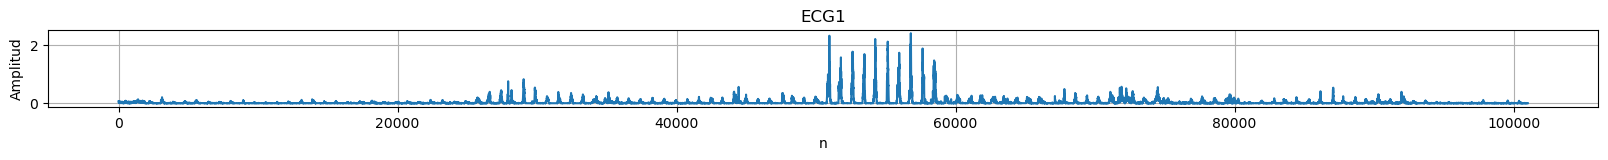

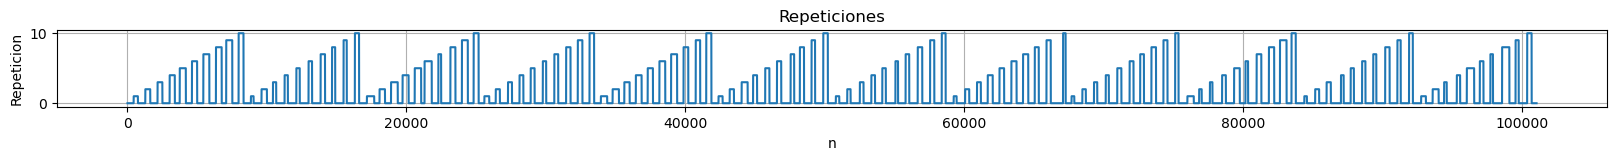

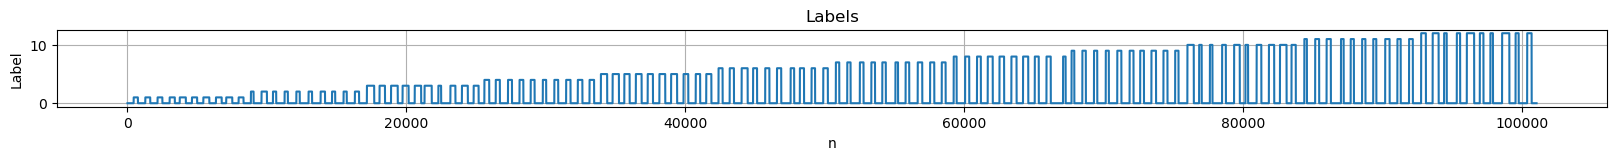

In [41]:
samples = 101014

"""
for i in emgs.columns:
  graficar_serie1(emgs[i],
                 titulo=f"ECG{i}",
                 num_puntos = samples,
                 etiqueta_x="n",
                 etiqueta_y="Amplitud")
"""

graficar_serie1(emgs[0],
               titulo="ECG1",
               num_puntos = samples,
               etiqueta_x="n",
               etiqueta_y="Amplitud")

graficar_serie1(repetitions[0],
               titulo="Repeticiones",
               num_puntos = samples,
               etiqueta_x="n",
               etiqueta_y="Repeticion")

graficar_serie1(labels[0],
               titulo="Labels",
               num_puntos = samples,
               etiqueta_x="n",
               etiqueta_y="Label")

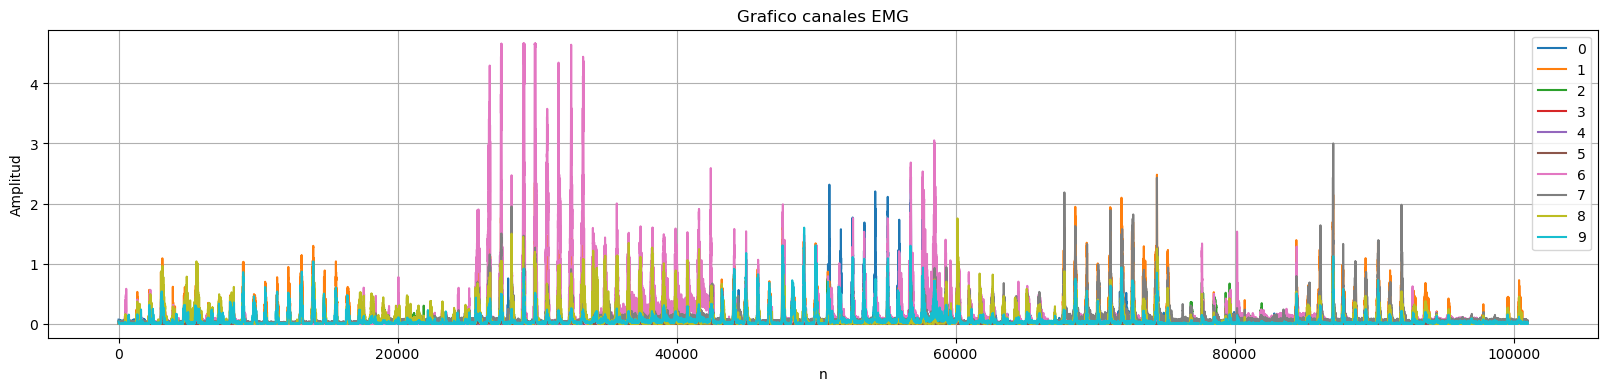

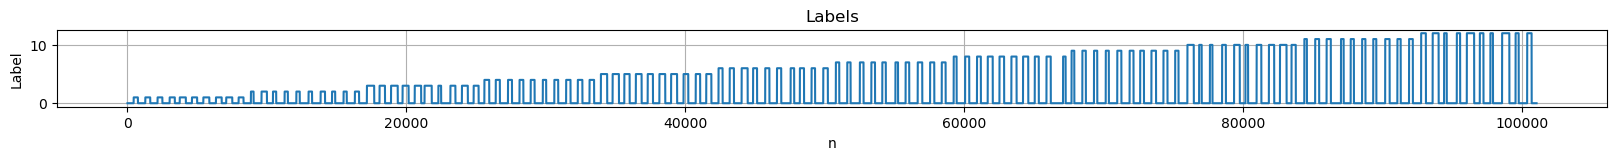

In [42]:
graficar_varias_columnas(emgs,
                         columnas = emgs.columns,
                         titulo = "Grafico canales EMG",
                         etiqueta_x="n",
                         etiqueta_y="Amplitud")

graficar_serie1(labels[0],
               titulo="Labels",
               num_puntos = samples,
               etiqueta_x="n",
               etiqueta_y="Label")

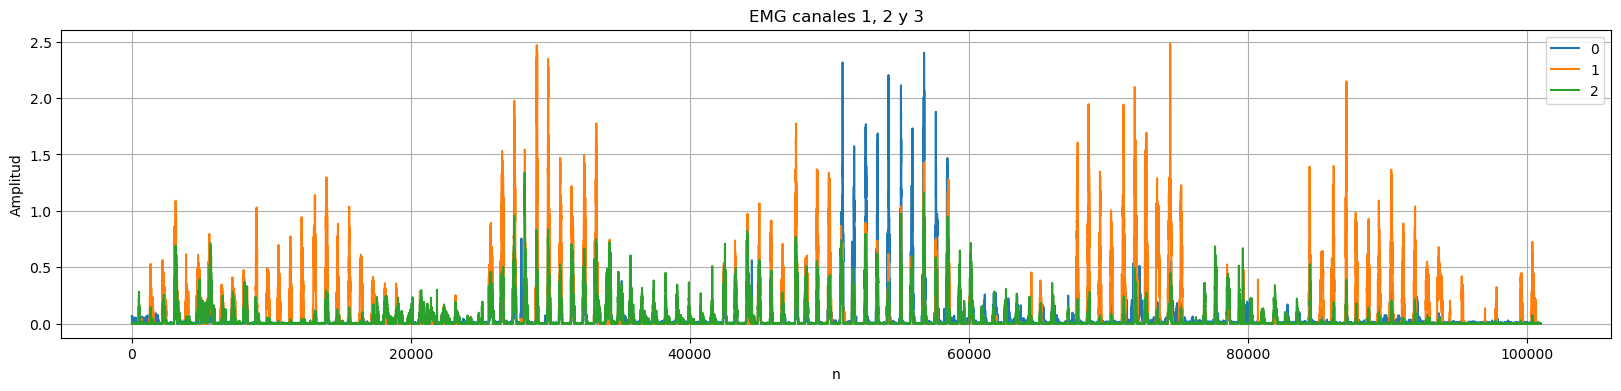

In [43]:
graficar_varias_columnas(emgs, columnas = emgs.columns[:3],
                         titulo="EMG canales 1, 2 y 3", etiqueta_x="n", etiqueta_y="Amplitud")

In [45]:
print(indice_numero(labels[0], 1))

(440, 8315)


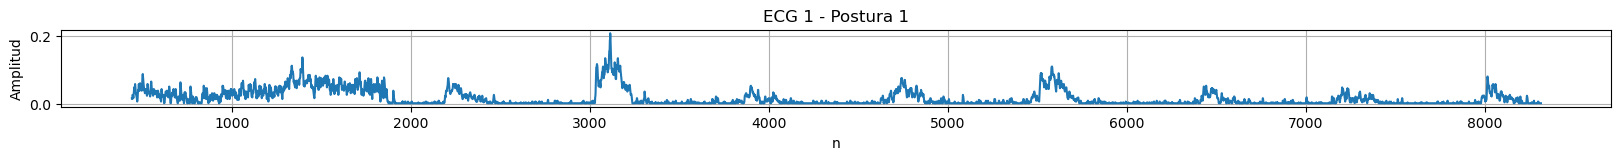

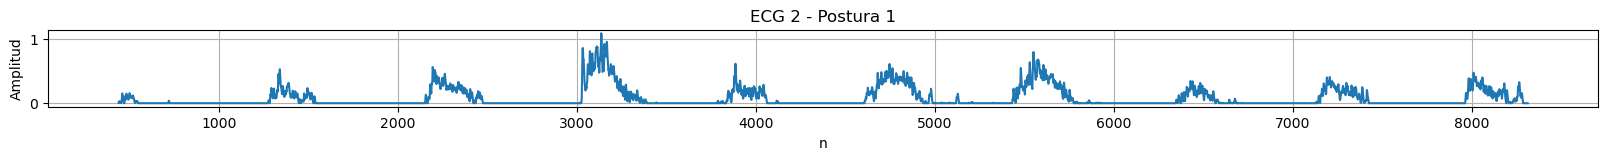

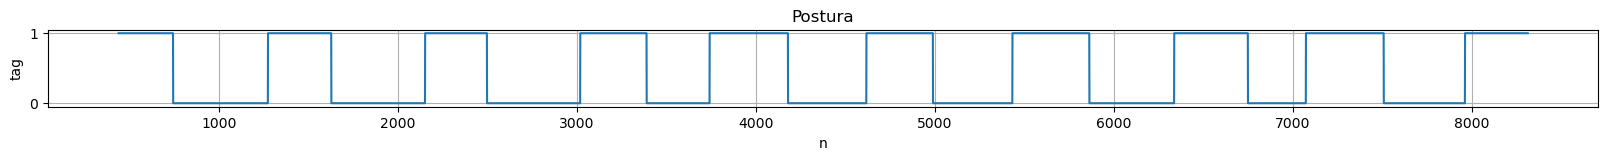

In [46]:
puntos_postura1 = indice_numero(labels[0], 1)
graficar_serie1(emgs[0],punto_inicial = puntos_postura1[0], num_puntos = puntos_postura1[1] - puntos_postura1[0], titulo="ECG 1 - Postura 1", etiqueta_x="n", etiqueta_y="Amplitud")
graficar_serie1(emgs[1],punto_inicial = puntos_postura1[0], num_puntos = puntos_postura1[1] - puntos_postura1[0], titulo="ECG 2 - Postura 1", etiqueta_x="n", etiqueta_y="Amplitud")
graficar_serie1(labels[0], punto_inicial = puntos_postura1[0], num_puntos = puntos_postura1[1] - puntos_postura1[0], titulo="Postura", etiqueta_x="n", etiqueta_y="tag")


In [47]:
detectar_cambios_nivel(labels[0], 1)

[(440, 1),
 (744, 1),
 (745, 0),
 (1274, 0),
 (1275, 1),
 (1628, 1),
 (1629, 0),
 (2152, 0),
 (2153, 1),
 (2498, 1),
 (2499, 0),
 (3019, 0),
 (3020, 1),
 (3390, 1),
 (3391, 0),
 (3742, 0),
 (3743, 1),
 (4180, 1),
 (4181, 0),
 (4618, 0),
 (4619, 1),
 (4990, 1),
 (4991, 0),
 (5434, 0),
 (5435, 1),
 (5864, 1),
 (5865, 0),
 (6338, 0),
 (6339, 1),
 (6750, 1),
 (6751, 0),
 (7074, 0),
 (7075, 1),
 (7509, 1),
 (7510, 0),
 (7963, 0),
 (7964, 1),
 (8315, 1)]

In [149]:
# Para minar si hay sincria en los cambios de nivel y las repeticiones (si hay)
detectar_cambios_nivel(repetitions[0], 1)

[(440, 1),
 (744, 1),
 (745, 0),
 (8844, 0),
 (8845, 1),
 (9037, 1),
 (9038, 0),
 (17159, 0),
 (17160, 1),
 (17683, 1),
 (17684, 0),
 (25581, 0),
 (25582, 1),
 (25929, 1),
 (25930, 0),
 (33932, 0),
 (33933, 1),
 (34384, 1),
 (34385, 0),
 (42366, 0),
 (42367, 1),
 (42659, 1),
 (42660, 0),
 (50776, 0),
 (50777, 1),
 (51022, 1),
 (51023, 0),
 (59224, 0),
 (59225, 1),
 (59435, 1),
 (59436, 0),
 (67674, 0),
 (67675, 1),
 (67871, 1),
 (67872, 0),
 (75978, 0),
 (75979, 1),
 (76436, 1),
 (76437, 0),
 (84360, 0),
 (84361, 1),
 (84546, 1),
 (84547, 0),
 (92734, 0),
 (92735, 1),
 (93075, 1)]

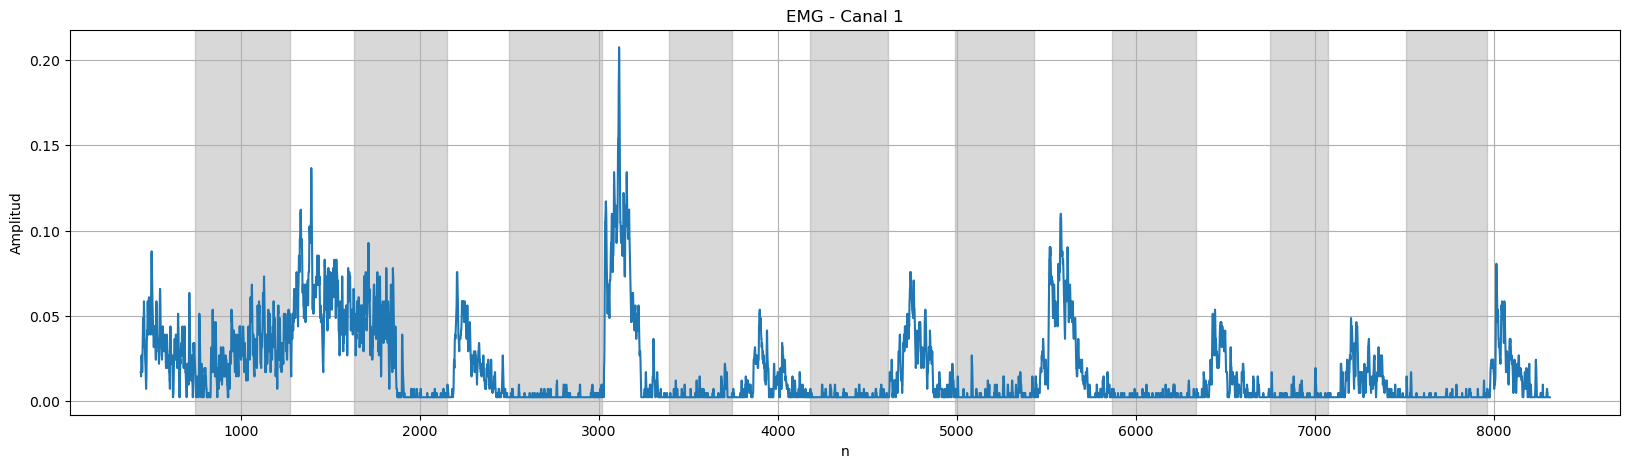

In [48]:
graficar_serie3(df_medida = emgs[0],
                df_num_label= labels[0],
                num = 1,
                titulo = "EMG - Canal 1",
                etiqueta_x = "n",
                etiqueta_y = "Amplitud")

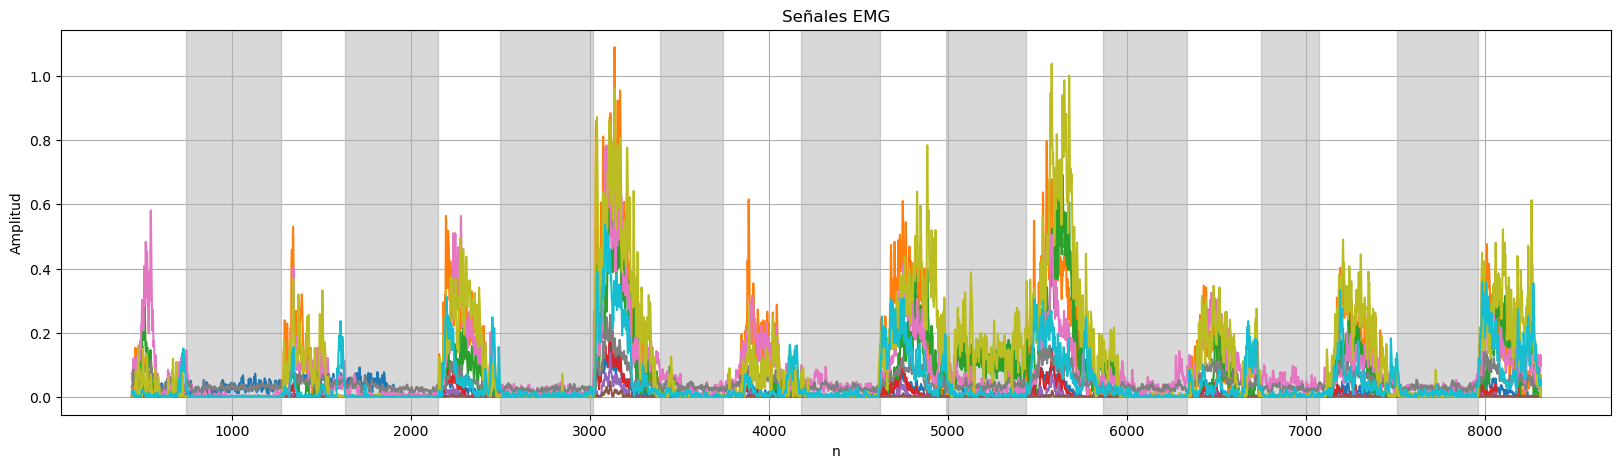

In [49]:
graficar_series4(df_medida= emgs,
                columnas_medida = emgs.columns,
                df_num_label = labels[0],
                num = 1,
                titulo="Señales EMG",
                etiqueta_x="n",
                etiqueta_y="Amplitud")

## Filtrado

Para mas información del filtrado:
* **Documentacion**: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
* **Ejemplos**:
  * https://medium.com/analytics-vidhya/how-to-filter-noise-with-a-low-pass-filter-python-885223e5e9b7
  * https://gist.github.com/junzis/e06eca03747fc194e322
  * https://github.com/scipy/scipy-cookbook/blob/main/ipython/ButterworthBandpass.ipynb
  * https://colab.research.google.com/drive/1HBuM2ifbsRZ6JaFLiz9aJqJBbnxISI8d?usp=sharing
  * https://github.com/pxcandeias/py-notebooks/blob/master/scipy_signal_filters_demonstration.ipynb
  * https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/preprocessing_and_decomposition/Signal_Filters.ipynb
  * https://gwosc.org/s/events/GW150914/GW150914_tutorial.html

> **Del paper**: "All data are synchronized by linearly interpolating
>all data to the highest recording frequency (i.e., 100Hz). Both sEMG
> and Cyberglove signals are subsequently low-pass filtered
> at 1Hz using a zero-phase second order Butterworth filter."



In [50]:
 # perform 2-order 1Hz low-pass filter
order = 2
fs = 100 # sample rate: 100Hz
cutoff = 1 # cutoff frequency
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = signal.butter(order, normal_cutoff, 'lowpass')
filter_emgs = pd.DataFrame()
for _col in range(emgs.shape[1]):
  filter_emgs[_col] = signal.filtfilt(b, a, emgs[_col])


In [51]:
filter_emgs.head()

,0,1,2,3,4,5,6,7,8,9
0,0.067523,0.002402,0.002399,0.002403,0.002395,0.009800,0.0024,0.050357,0.0024,0.034192
1,0.066284,0.002402,0.002402,0.002404,0.002395,0.009474,0.0024,0.049707,0.0024,0.032820
2,0.065045,0.002403,0.002405,0.002404,0.002395,0.009149,0.0024,0.049050,0.0024,0.031452
3,0.063810,0.002403,0.002409,0.002405,0.002395,0.008827,0.0024,0.048390,0.0024,0.030091
4,0.062581,0.002404,0.002412,0.002406,0.002395,0.008507,0.0024,0.047726,0.0024,0.028743


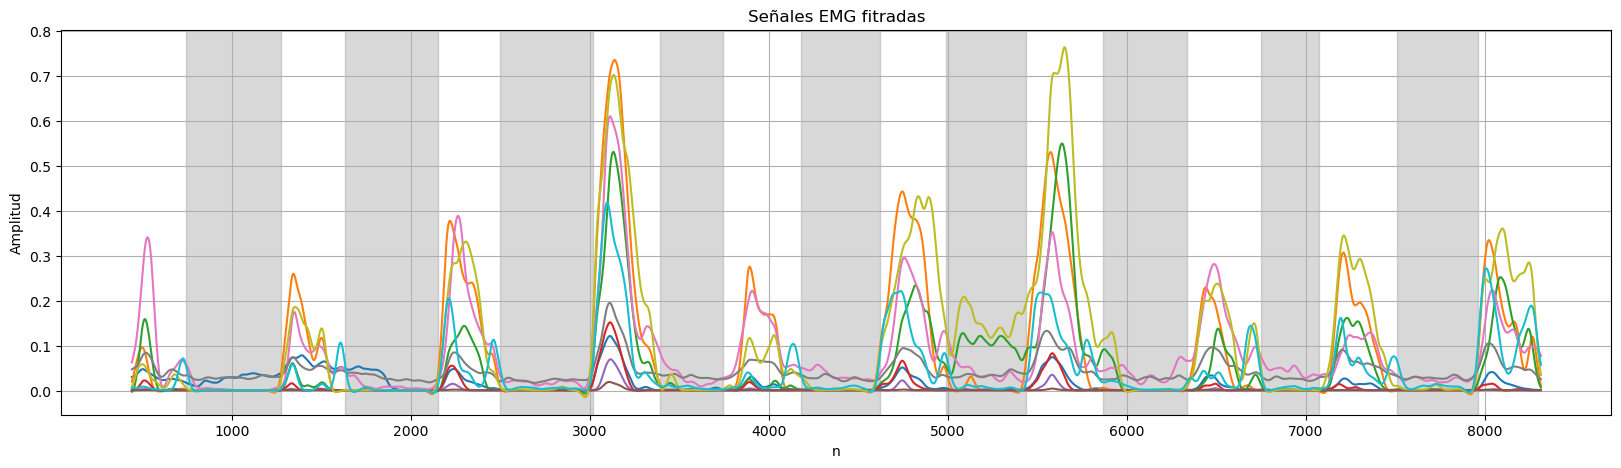

In [52]:
graficar_series4(df_medida= filter_emgs,
                columnas_medida = emgs.columns,
                df_num_label = labels[0],
                num = 1,
                titulo="Señales EMG fitradas",
                etiqueta_x="n",
                etiqueta_y="Amplitud")

In [53]:
# https://github.com/parasgulati8/NinaPro-Helper-Library/blob/master/NinaPro_Utility.py
def filter_data(data, f, butterworth_order = 4, btype = 'lowpass'):
    emg_data = data.values[:,:12]

    f_sampling = 2000
    nyquist = f_sampling/2
    if isinstance(f, int):
        fc = f/nyquist
    else:
        fc = list(f)
        for i in range(len(f)):
            fc[i] = fc[i]/nyquist

    b,a = signal.butter(butterworth_order, fc, btype=btype)
    transpose = emg_data.T.copy()

    for i in range(len(transpose)):
        transpose[i] = (signal.lfilter(b, a, transpose[i]))

    filtered = pd.DataFrame(transpose.T)
    filtered['stimulus'] = data['stimulus']
    filtered['repetition'] = data['repetition']

    return filtered


## Normalizacion

La transformación **μ-law** se define por la siguiente ecuación:

$$
F(x) = \frac{\log(1 + \mu |x|)}{\log(1 + \mu)} \cdot \text{sgn}(x)
$$

In [54]:
# Codigo tomado de: https://github.com/increase24/Ninapro-dataset-processing/blob/master/dataloaders/db1.py
# u-law normalization
u = 256
filter_emgs_norm = np.sign(filter_emgs) * np.log(1+u*abs(filter_emgs))/np.log(1+u)

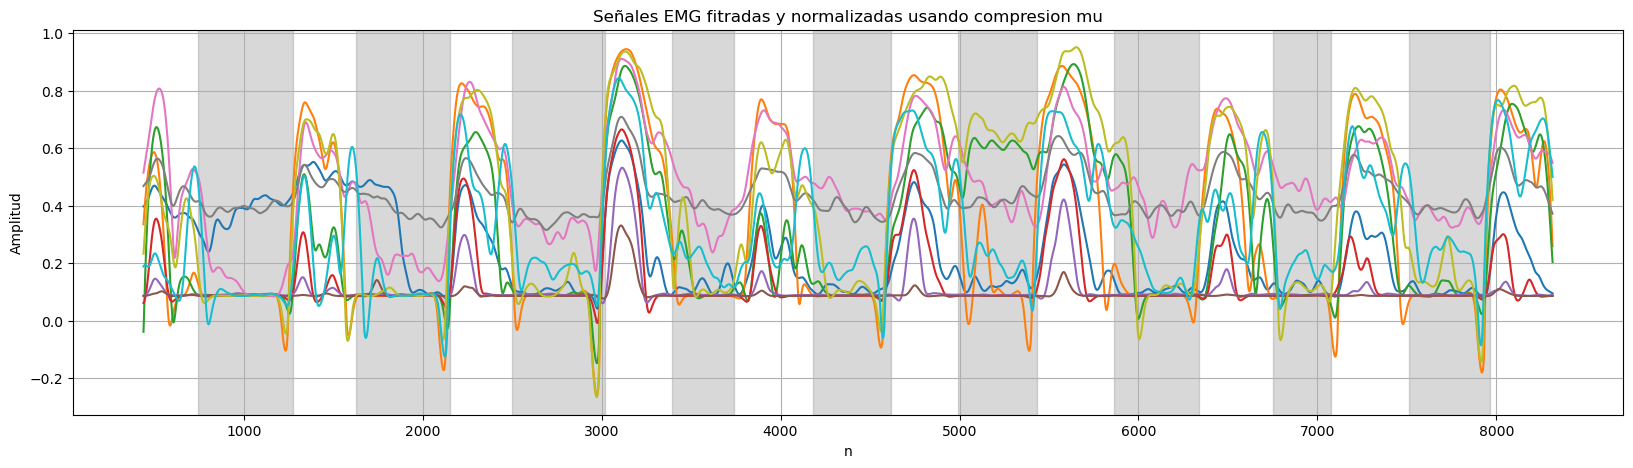

In [55]:
graficar_series4(df_medida= filter_emgs_norm,
                columnas_medida = emgs.columns,
                df_num_label = labels[0],
                num = 1,
                titulo="Señales EMG fitradas y normalizadas usando compresion mu",
                etiqueta_x="n",
                etiqueta_y="Amplitud")

## Segmentacion

Al respecto el articulo original dice lo siguiente:

> "Samples with an ambiguous label, that is those recorded during 
> transition between rest and the actual movement, are removed by
> dividing each movement (including rest) in three equally sized
> segments and only retaining data from the center segment. To ensure
> computational feasibility, we then average the data contained in
> this center segment to obtain a single sample per movement. Note
> that there are thus ten samples for each subject-movement combination
> (i.e., one per repetition) and that half of the samples belong
> to the rest movement. "

Lo anterior sugiere (por lo menos segun lo que se entendió, si es que entendimos bien) que no se emplearon ventanas deslizantes de tamaño fijo para la segmentación si no que se partir de los momentos de descanso entre un postura se llevaron a cabo dos procedimientos iniciales:
1. Seleccion de los segmentos.
2. Promedio de los segmentos empleados.
3. Seleccion de tramos de tamaño fijo para definir el vector caracteristico a emplear.

En el repositorio (https://github.com/increase24/Ninapro-dataset-processing/blob/master/dataloaders/db1.py) muestra un proceso completo de procesamiento de datos crudos para ninapro. En este se puede apreciar que hay un uso de ventanas deslizantes. A continuación se comenta un poco lo que se entendio:

```py
# segmentation of training and testing samples
length_dots = len(labels) # 101014
data_train = []
labels_train = []
data_val = []
labels_val = []
print(length_dots)

# [20]
seq_lens = [20] # sample rate: 100Hz -> 1 dot: 10ms
step = 1
# length_dots%seq_len = 101014%20 = 14
# length_dots - length_dots%seq_len = 101014 - 101014%20 = 101000
for seq_len in seq_lens:
  for idx in range(0, length_dots - length_dots%seq_len, step):
    if labels.iloc[idx][0] > 0 and labels.iloc[idx + seq_len - 1][0] > 0 and labels.iloc[idx][0] == labels.iloc[idx+seq_len-1][0]:
      repetition = repetitions.iloc[idx][0]
      if repetition in [2,5,7]: # val dataset
        data_val.append(emgs[idx:idx+seq_len,:])
        labels_val.append(labels[idx])
      else: # train dataset
        data_train.append(emgs[idx:idx+seq_len,:])
        labels_train.append(labels[idx])
print(repetition)
```

En el siguiente repo (https://github.com/parasgulati8/NinaPro-Helper-Library/blob/master/NinaPro_Utility.py), hay funciones que permiten el preprocesamiento de la señal, e incluso la particion de los datos. Algunas son:
* `normalise` (usando el `StandardScaler` de `sklearn`)
* `filter_data`
* `rectify`
* `windowing`

En el código [FeaturesExtraction.py](https://github.com/cnzero/NinaproCNN/blob/master/FeaturesExtraction.py), se tienen algunas funciones para trabajar la extracción de caracteristicas, pero por lo menos por ahora no vamos a ahondar en esto sino en la parte de la segmentación. La idea es, realizar un enventanado mas como el siguiente:

![ventanas](windowing-example.png)

> **Importante**
> Se uso IA para generar codigo en muchas partes. La verdad, entre mas la uso, mas creo que la IA me va a dejar sin trabajo.

La siguiente función segmenta sin tener en cuenta si el valor del label

In [56]:
# Promt to @Chat-GPT: 
def segment_signal(data, window_size, step_size):
    """
    Segmenta una señal en ventanas deslizantes.
    
    Parámetros:
    data : array-like
        La señal EMG que se desea segmentar.
    window_size : int
        El tamaño de cada ventana (en número de muestras).
    step_size : int
        El número de muestras entre el inicio de ventanas consecutivas.
    
    Retorno:
    windows : list
        Una lista de ventanas segmentadas.
    """
    windows = []
    for start in range(0, len(data) - window_size + 1, step_size):
        windows.append(data[start:start + window_size])
    return np.array(windows)

In [57]:
# data_emg = np.random.randint(1, 11, size = 50)

data_emg = [4, 3, 1, 9, 10, 2, 6, 10, 5, 10, 
            2, 5, 5, 3, 2, 3, 5, 10, 4, 4, 
            10, 7, 4, 5, 7, 4, 3, 10, 2, 1, 
            3, 1, 3, 4, 7, 9, 8, 8, 9, 4, 
            5, 4, 7, 4, 6, 3, 5, 6, 5, 9]

postura =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
            1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


print(len(data_emg))
print(data_emg)
print()
segm = segment_signal(data_emg, 10, 5)
print(len(segm))
print(segm)

50
[4, 3, 1, 9, 10, 2, 6, 10, 5, 10, 2, 5, 5, 3, 2, 3, 5, 10, 4, 4, 10, 7, 4, 5, 7, 4, 3, 10, 2, 1, 3, 1, 3, 4, 7, 9, 8, 8, 9, 4, 5, 4, 7, 4, 6, 3, 5, 6, 5, 9]

9
[[ 4  3  1  9 10  2  6 10  5 10]
 [ 2  6 10  5 10  2  5  5  3  2]
 [ 2  5  5  3  2  3  5 10  4  4]
 [ 3  5 10  4  4 10  7  4  5  7]
 [10  7  4  5  7  4  3 10  2  1]
 [ 4  3 10  2  1  3  1  3  4  7]
 [ 3  1  3  4  7  9  8  8  9  4]
 [ 9  8  8  9  4  5  4  7  4  6]
 [ 5  4  7  4  6  3  5  6  5  9]]


La siguiente funcion segmenta eliminando los segmentos en los que los labels son diferentes (transicion)

In [58]:
rep = [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
print(set(rep))
print(rep.count(0))
print(rep.count(1))
counts = [[item,rep.count(item)] for item in set(rep)]
print(counts)

serie = pd.Series(rep)
valor_mas_repetido = serie.mode()[0]
print(valor_mas_repetido)
valor_mas_repetido2 = serie.value_counts().idxmax()
print(valor_mas_repetido2)

{0, 1}
2
8
[[0, 2], [1, 8]]
1
1


In [59]:
# Promt to @Chat-GPT: 
def segment_signal2(data, postura, window_size, step_size):
    """
    Segmenta una señal en ventanas deslizantes.
    
    Parámetros:
    data : array-like
        La señal EMG que se desea segmentar.
    window_size : int
        El tamaño de cada ventana (en número de muestras).
    step_size : int
        El número de muestras entre el inicio de ventanas consecutivas.
    
    Retorno:
    windows : list
        Una lista de ventanas segmentadas.
    """
    windows = []
    labels = []
    for start in range(0, len(data) - window_size + 1, step_size):
        label = postura[start:start + window_size] # Buscar por el lado de la moda
        if (len(set(label)) == 1):
            print(label[0])
            windows.append(data[start:start + window_size])
            labels.append(label[0]) 
    return np.column_stack((windows,labels))

Ensayo de la funcion.

In [60]:
data_emg = [4, 3, 1, 9, 10, 2, 6, 10, 5, 10, 
            2, 5, 5, 3, 2, 3, 5, 10, 4, 4, 
            10, 7, 4, 5, 7, 4, 3, 10, 2, 1, 
            3, 1, 3, 4, 7, 9, 8, 8, 9, 4, 
            5, 4, 7, 4, 6, 3, 5, 6, 5, 9]

postura =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
            1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

V = segment_signal2(data_emg, postura, 10, 5)
print(V)

0
0
0
1
1
[[ 4  3  1  9 10  2  6 10  5 10  0]
 [ 2  6 10  5 10  2  5  5  3  2  0]
 [ 2  5  5  3  2  3  5 10  4  4  0]
 [ 4  3 10  2  1  3  1  3  4  7  1]
 [ 5  4  7  4  6  3  5  6  5  9  1]]


In [61]:
# Promt to @Chat-GPT: 
def segment_signal3(emg_data, postura_data, repeticion_data, window_size, step_size):
    """
    Segmenta una señal en ventanas deslizantes.
    
    Parámetros:
    emg_data : array-like
        La señal EMG que se desea segmentar.
        
    window_size : int
        El tamaño de cada ventana (en número de muestras).
    step_size : int
        El número de muestras entre el inicio de ventanas consecutivas.
    
    Retorno:
    windows : list
        Una lista de ventanas segmentadas.
    """
    windows = []
    labels = []
    for start in range(0, len(data) - window_size + 1, step_size):
        label = postura[start:start + window_size] # Buscar por el lado de la moda
        if (len(set(label)) == 1):
            print(label[0])
            windows.append(data[start:start + window_size])
            labels.append(label[0]) 
    return np.column_stack((windows,labels))

Vamos a tratar de mejorar la función para ver si es capaz de lidiar con dataframes de tal manera que logre segmentar la señal y rezar que en primera instancia de con unos datos sencillitos, luego, la idea es lidiar con lo demas.

**Conclusión**: La siguiente funcion permite (por lo menos simula lo esperado) la segmentación de datos de emg teniendo en cuenta que se tomen solo las ventanas en un estado donde no hay transición de la señal (datos del tag asociado a la postura). Aun falta la parte asociada el ejercicio. 

In [142]:
# Plantilla base.
def segmentar_datos_v1(emg_data, 
                    postura_data, 
                    repeticion_data, 
                    window_size = None, 
                    step_size = None):
    
    ################################################################## 
    #             Verificacion de prerequisitos basicos              #
    ##################################################################

    if not isinstance(emg_data, pd.DataFrame):
        raise TypeError("Los datos deben ser un dataframe")
    
    if isinstance(postura_data, (list, np.ndarray)):
        postura_data = pd.DataFrame({"label": postura_data})
    
    if isinstance(repeticion_data, (list, np.ndarray)):
        repeticion_data = pd.DataFrame({"rep": repeticion_data})

    #print(emg_data)
    ventanas = []
    ventana = pd.DataFrame()
    for i in range(0, len(emg_data) - window_size + 1, step_size):
        label_window = postura_data.iloc[i:i + window_size]
        if label_window.nunique()[0] == 1:
            # Ventana con un label fijo (se agrega)
            # label = label_window.mode.iloc[0,0] # se usa la moda
            ventana = pd.concat([emg_data.iloc[i:i + window_size].copy().reset_index(drop=True), 
                                 label_window.copy().reset_index(drop=True)], axis=1)
            ventanas.append(ventana)
            print("---------")
        # print(emg_data.iloc[i:i + window_size])
    print(len(ventanas))
    return ventanas

    
    
    
    
    

In [144]:
# Pruebas a la brava
# segmentar_datos(data_emg, postura, postura)
# segmentar_datos(filter_emgs_norm, postura, postura)
# segmentar_datos(filter_emgs_norm.iloc[:100], postura, postura)
# segmentar_datos(filter_emgs_norm.iloc[:20], postura, postura, 10, 5)

data_emg = [4, 3, 1, 9, 10, 2, 6, 10, 5, 10, 
            2, 5, 5, 3, 2, 3, 5, 10, 4, 4, 
            10, 7, 4, 5, 7, 4, 3, 10, 2, 1, 
            3, 1, 3, 4, 7, 9, 8, 8, 9, 4, 
            5, 4, 7, 4, 6, 3, 5, 6, 5, 9]

df_emg = pd.DataFrame({"emg1": data_emg,
                       "emg2": data_emg})

postura =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 
            1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


s = segmentar_datos_v1(df_emg, postura, postura, 10, 5)
print(s[0])
print(s[1])
print(s[2])
print(s[3])
print(s[4])
#print(s[5])

---------
---------
---------
---------
---------
5
   emg1  emg2  label
0     4     4      0
1     3     3      0
2     1     1      0
3     9     9      0
4    10    10      0
5     2     2      0
6     6     6      0
7    10    10      0
8     5     5      0
9    10    10      0
   emg1  emg2  label
0     2     2      0
1     6     6      0
2    10    10      0
3     5     5      0
4    10    10      0
5     2     2      0
6     5     5      0
7     5     5      0
8     3     3      0
9     2     2      0
   emg1  emg2  label
0     2     2      0
1     5     5      0
2     5     5      0
3     3     3      0
4     2     2      0
5     3     3      0
6     5     5      0
7    10    10      0
8     4     4      0
9     4     4      0
   emg1  emg2  label
0     3     3      0
1     5     5      0
2    10    10      0
3     4     4      0
4     4     4      0
5    10    10      0
6     7     7      0
7     4     4      0
8     5     5      0
9     7     7      0
   emg1  emg2  label
0  

**Intento**: en esta parte se intentará realizar la segmentación de los datos teniendo en cuenta ahora si el numero del ejercicio. Por ahora surgen las siguientes preguntas:
* Hay sincronización entre los labels y los ejercicios (depronto ver donde estan los cruces por cero).

In [161]:
# Plantilla base.
def segmentar_datos(emg_data, 
                    postura_data, 
                    repeticion_data, 
                    window_size = None, 
                    step_size = None):
    
    ################################################################## 
    #             Verificacion de prerequisitos basicos              #
    ##################################################################

    if not isinstance(emg_data, pd.DataFrame):
        raise TypeError("Los datos deben ser un dataframe")
    
    if isinstance(postura_data, (list, np.ndarray)):
        postura_data = pd.DataFrame({"label": postura_data})
    
    if isinstance(repeticion_data, (list, np.ndarray)):
        repeticion_data = pd.DataFrame({"rep": repeticion_data})

    #print(emg_data)
    ventanas = []
    ventana = pd.DataFrame()
    for i in range(0, len(emg_data) - window_size + 1, step_size):
        label_window = postura_data.iloc[i:i + window_size]
        rep_window = repeticion_data.iloc[i:i + window_size]
        if label_window.nunique()[0] == 1:
            # label = label_window.mode.iloc[0,0] # se usa la moda
            ventana = pd.concat([emg_data.iloc[i:i + window_size].copy().reset_index(drop=True), 
                                 rep_window.copy().reset_index(drop=True),
                                 label_window.copy().reset_index(drop=True)], 
                                 axis=1)
            ventanas.append(ventana)
            print(f"--")
        # print(emg_data.iloc[i:i + window_size])
    print(len(ventanas))
    return ventanas

In [162]:
data_emg = [4, 3, 1, 9, 10, 2, 6, 10, 5, 10, 
            2, 5, 5, 3, 2, 3, 5, 10, 4, 4, 
            10, 7, 4, 5, 7, 4, 3, 10, 2, 1, 
            3, 1, 3, 4, 7, 9, 8, 8, 9, 4, 
            5, 4, 7, 4, 6, 3, 5, 6, 5, 9]

df_emg = pd.DataFrame({"emg1": data_emg})

postura =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 
            1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

repeticion =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
            2, 1, 1, 1, 1, 1, 1, 1, 1, 1]

s = segmentar_datos_v1(df_emg, postura, repeticion, 10, 10)
for w in s:
    print(w)

---------
---------
---------
3
   emg1  label
0     4      0
1     3      0
2     1      0
3     9      0
4    10      0
5     2      0
6     6      0
7    10      0
8     5      0
9    10      0
   emg1  label
0     2      0
1     5      0
2     5      0
3     3      0
4     2      0
5     3      0
6     5      0
7    10      0
8     4      0
9     4      0
   emg1  label
0     5      1
1     4      1
2     7      1
3     4      1
4     6      1
5     3      1
6     5      1
7     6      1
8     5      1
9     9      1


**Pendiente**: 
* Cuadrar de tal manera que lo que entre sea un dataframe o un array, segun sea el caso.
* Cuadrar para que se almacene el numero de la repeticion (puede servir como tag para separacion de datos de entrenamiento y test).

## Pendientes

Ver los siguientes codigos:
* https://github.com/parasgulati8/NinaPro-Helper-Library
* https://github.com/Lif3line/nina_helper_package_mk2
* https://github.com/cnzero/NinaproCNN/tree/master
* https://github.com/sebastiankmiec/NinaTools
* https://github.com/sun2009ban/divide_NinaPro_database_5
* https://github.com/tsagkas/sEMG-HandGestureRecognition (codigo + tesis)
* https://repositorio.unbosque.edu.co/items/61d39597-5a61-491c-909a-849e53efe8ad


En https://github.com/parasgulati8/NinaPro-Helper-Library/blob/master/ esta lo que necesitamos de alguna manera.